<a href="https://colab.research.google.com/github/primroseisaseal/Cryptocurrencies-forecast/blob/main/final_for_appendix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=00bd953b902c42f697d60568bf63aa03313716a31d62f25023a1b773fb98cbd3
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta


In [ ]:
# pip install xgboost==1.6.1

In [ ]:

!pip install xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/content/xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl'



In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# General
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import math
from sklearn.metrics import mean_squared_error

#LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#Technical analysis
import ta
from ta.trend import macd
from ta import momentum
from ta import trend
from ta import volatility
from ta import volume

#Feature delection
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# xgboost
import xgboost
from xgboost import XGBRegressor
print("xgboost", xgboost.__version__)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.metrics import classification_report,confusion_matrix
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
import sklearn.metrics as sm
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

xgboost 0.90


# Get features
-Dolatsara, H., Kibis, E., Caglar, M., Simsek, S., Dag, A., Dolatsara, G. and Delen, D., 2022. An interpretable decision-support systems for daily cryptocurrency trading. Expert Systems with Applications, 203, p.117409.
https://doi.org/10.1016/j.eswa.2022.117409

-Toledo, J. and Souza, D., 2022. Signal Prediction in Cryptocurrency Tradeoperations: A Machine Learning-Based Approach. SSRN Electronic Journal,.
https://dx.doi.org/10.2139/ssrn.4062476


In [ ]:
# get all features
def get_features_all(data):
  '''
    Return dataframe with cryotocurrency features from Caglar et al. and Toledo et al.

    Input:
        data (dataframe): the data fram of imported cryptocurrencies price history from y! finance.

    Output:
        data (dataframe): the dataframe with cryotocurrency features from Caglar et al. and Toledo et al.
    
  '''
  data['MACD'] = macd(data['Close'], window_slow = 26, window_fast = 12)
  data['PPO'] = momentum.ppo(data['Close'], window_slow = 26, window_fast = 12)
  data['CCI'] = trend.cci(data['High'], data['Low'], data['Close'] )
  data['ROC'] = momentum.roc(data['Close'])
  data['Stochastic Oscillator'] = momentum.stoch(data['High'], data['Low'], data['Close'] )
  data['Williams_r'] = momentum.williams_r(data['High'], data['Low'], data['Close'])
  data['SMA_20'] = trend.sma_indicator(data['Close'], window =20)
  data['Open_SMA_3'] = trend.ema_indicator(data['Open'], window =3)
  data['Diff_OpenSMA3'] = data['Open_SMA_3'].diff(periods=1)
  data['EMA_20'] =trend.ema_indicator(data['Close'], window =20)
  data['Open_EMA_5'] = trend.ema_indicator(data['Open'], window =20)
  data['Diff_OpenEMA5'] = data['Open_EMA_5'].diff(periods=1)
  data.loc[data['Diff_OpenEMA5'] < 0, 'Movement_OpenEMA5'] = -1 
  data.loc[data['Diff_OpenEMA5'] > 0, 'Movement_OpenEMA5'] = 1 
  data['Diff_Close'] = data['Close'].diff(periods=1)
  data.loc[data['Diff_Close'] < 0, 'Movement_Close'] = -1 
  data.loc[data['Diff_Close'] > 0, 'Movement_Close'] = 1 
  data['Bollinger_Bands_L'] = volatility.bollinger_lband(data['Close'])
  data['Bollinger_Bands_M'] = volatility.bollinger_mavg(data['Close']) 
  data['Bollinger_Bands_H'] = volatility.bollinger_hband(data['Close'])
  data['OBV'] = volume.on_balance_volume(data['Close'], data['Volume'])
  data['Chaikin'] = volume.chaikin_money_flow(data['High'], data['Low'], data['Close'], data['Volume'])
  data['MFI'] = volume.money_flow_index(data['High'], data['Low'], data['Close'], data['Volume'])
  data['ATR'] = volatility.average_true_range(data['High'], data['Low'], data['Close'])
  data['Open_RSI'] = momentum.rsi(data['Open'])
  data['Close_RSI'] = momentum.rsi(data['Close'])
  data['Diff_CloseRSI'] = data['Close_RSI'].diff(periods=1)
  data.loc[data['Diff_CloseRSI'] < 0, 'Movement_closeRSI'] = -1 
  data.loc[data['Diff_CloseRSI'] > 0, 'Movement_closeRSI'] = 1 
  
  data['CloseEMA5'] = trend.ema_indicator(data['Close'], window =5)
  data['Diff_CloseEMA5'] = data['CloseEMA5'].diff(periods=1)
  data.loc[data['Diff_CloseEMA5'] < 0, 'Movement_Diff_CloseEMA5'] = -1 
  data.loc[data['Diff_CloseEMA5'] > 0, 'Movement_Diff_CloseEMA5'] = 1 
  data['CloseSMA3'] = trend.ema_indicator(data['Close'], window =3)
  data['Diff_CloseSMA3'] = data['CloseSMA3'].diff(periods=1)
  data.loc[data['Diff_CloseSMA3'] < 0, 'Movement_closeSMA3'] = -1 
  data.loc[data['Diff_CloseSMA3'] > 0, 'Movement_closeSMA3'] = 1
  return data

def get_gold_data(gold):
  '''
    Return dataframe with gold features from Caglar et al. 

    Input:
        gold (dataframe): the data fram of imported gold price history from y! finance.

    Output:
        gold (dataframe): the dataframe with gold features from Caglar et al. 
    
  '''
  gold['Movement_gold_Open'] = gold['Open'].diff(periods=1)
  gold['Open_RSI'] = momentum.rsi(gold['Open'])
  gold['Close_RSI'] = momentum.rsi(gold['Close'])
  gold = gold.iloc[:,6:]
  prefix = 'gold_'
  gold = gold.add_prefix(prefix)
  return gold


def get_data_DJI(DJI):
  '''
    Return dataframe with dow jones features from Caglar et al. 

    Input:
        DJI (dataframe): the data fram of imported dow jones price history from y! finance.

    Output:
        DJI (dataframe): the dataframe with dow jones features from Caglar et al. 
    
  '''
  DJI['Open_SMA20'] = trend.sma_indicator(DJI['Open'], window =20)
  DJI = DJI[['Volume', 'Open_SMA20']]
  prefix = 'DJI_'
  DJI = DJI.add_prefix(prefix)
  return DJI

def get_data_oil(oil):
  '''
    Return dataframe with oil features from Caglar et al. 

    Input:
        oil (dataframe): the data fram of imported oil price history from y! finance.

    Output:
        oil (dataframe): the dataframe with oil features from Caglar et al.
  '''
  oil['Diff_close'] = oil['Close'].diff(periods=1)
  oil = oil[['Volume', 'Diff_close']]
  prefix = 'oil_'
  oil = oil.add_prefix(prefix)
  return oil

def get_data_usdeur(usdeur):
  '''
    Return dataframe with USD/EUR features from Caglar et al.

    Input:
        usdeur (dataframe): the data fram of imported USD/EUR price history from y! finance.

    Output:
        usdeur (dataframe): the dataframe with USD/EUR features from Caglar et al. 
    
  '''
  usdeur['Open_SMA20'] = trend.sma_indicator(usdeur['Open'], window =20)
  usdeur = usdeur[['Open', 'Adj Close', 'Open_SMA20']]
  prefix = 'usdeur_'
  usdeur = usdeur.add_prefix(prefix)
  return usdeur

def get_data_usdcny(usdcny):
  '''
    Return dataframe with USD/CNY features from Caglar et al. 

    Input:
        usdcny (dataframe): the data fram of imported USD/CNY price history from y! finance.

    Output:
        usdcny (dataframe): the dataframe with USD/CNY features from Caglar et al. 
    
  '''
  usdcny = usdcny[['Open', 'Close', 'High']]
  prefix = 'usdcny_'
  usdcny = usdcny.add_prefix(prefix)
  
  return usdcny

In [ ]:
# combine all features from the above functions
def get_overall_data(data, gold, dji, oil, usdeur, usdcny):
  '''
    Return dataframe with all features from Caglar et al. and Toledo et al.. 

    Input:
        data (dataframe): the data fram of imported all price history from y! finance.

    Output:
        final_data (dataframe): the dataframe with all features from Caglar et al. and Toledo et al.. 
    
  '''
  DATA = get_features_14(data)
  GOLD = get_gold_data(gold)
  DJI = get_data_DJI(dji)
  OIL = get_data_oil(oil)
  USDEUR = get_data_usdeur(usdeur)
  USDCNY = get_data_usdcny(usdcny)
  final_data = DATA.merge(DJI, on='Date')
  final_data = final_data.merge(GOLD, on ='Date')
  final_data = final_data.merge(USDEUR, on ='Date')
  final_data = final_data.merge(OIL, on ='Date')
  final_data = final_data.merge(USDCNY, on ='Date')
  return final_data

# Features Selection

2 Groups:

1. Use original data provided by the API: High Low Close Open

2. Use attributes from the 2 papers above then use feature selection technic to get only relevent features.

Ref: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

In [ ]:

# employ all function above to create dataframe of feature group 1 and 2.

yf.pdr_override() 


def get_feature_groups(coin_ticker, start_date= "2019-01-01" , end_date = "2022-06-15"):
  '''
    Return dataframes of feature group 1 and 2.

    Input:
        coin_ticker (string): coin ticker
        start_date (string): start date with the format of "YYYY-MM-DD"  
        end_date (string): end date with the format of "YYYY-MM-DD"  

    Output:
        df_group_1 (dataframe): the dataframe of feature group 1
        df_group_2 (dataframe): the dataframe of feature group 2
    
  '''
  #download data
  df_coin = pdr.get_data_yahoo(coin_ticker, start=start_date, end=end_date)
  gold = pdr.get_data_yahoo("GC=F", start=start_date, end=end_date)
  dji = pdr.get_data_yahoo("^DJI", start=start_date, end=end_date)
  oil = pdr.get_data_yahoo("CL=F", start=start_date, end=end_date)
  usdeur = pdr.get_data_yahoo("EUR=X", start=start_date, end=end_date)
  usdcny = pdr.get_data_yahoo("CNY=X", start=start_date, end=end_date)
  
  #create full df
  df_all_features = get_overall_data(df_coin, gold, dji, oil, usdeur, usdcny)
  df_all_features = df_all_features.dropna()

  # get group 1
  df_group_1 = df_all_features[['Open', 'Close', 'High', 'Low']]

  # get group 2
  X = df_all_features.drop('Close', axis =1)
  y = df_all_features['Close']
  # define feature selection
  fs = SelectKBest(score_func=f_regression, k=10)
  # apply feature selection
  X_selected = fs.fit_transform(X, y)
  features_name = fs.get_feature_names_out()
  X_selected = pd.DataFrame(X_selected, columns = features_name.tolist())
  X_selected['Close'] = np.array(df_all_features['Close'].values.tolist())
  X_selected
  df_group_2 = X_selected.copy()
  return df_group_1, df_group_2



# Multivariate LSTM

In [ ]:


def get_LSTM(df, Title, hop = 2, train_percent = 0.8):
  '''
    Return actual price and predict price comparison plots and error metrics of LSTM.

    Input:
        df (dataframe): dataframe of input features and actual target feature
        Title (string): Title of the graph
        hop (int): time step
        train_percent (float): training set ratio

  '''
  train_size = int(len(df)*train_percent)
  df_train = df.iloc[:train_size,1:]

  df_test = df.iloc[train_size:,1:]
  df_test['Close']= df_test['Close'].astype('float64')

  # For Training Set, split into X (Open, High, low, CLose) and y (Close) then scale it
  sc = MinMaxScaler(feature_range=(0,1))
  data_train_scaled = sc.fit_transform(df_train)

  sc2 = MinMaxScaler(feature_range=(0,1))
  y_train_scaled = sc2.fit_transform(df_train[['Close']])

  # create 3D df for LSTM
  X_train = []
  y_train = []
  for i in range(hop, train_size):
    X_train.append(data_train_scaled[i-hop:i])
    y_train.append(y_train_scaled[i][0])
  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],  X_train.shape[2]))

  # fit trian df into the model
  model = Sequential()
  model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.1))
  model.add(LSTM(units = 100, return_sequences = True))
  model.add(Dropout(0.1))
  model.add(LSTM(units = 100, return_sequences = True))
  model.add(Dropout(0.1))
  model.add(LSTM(units = 100))
  model.add(Dropout(0.1))
  model.add(Dense(units = 1))
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  model.fit(X_train, y_train, epochs = 50, batch_size = 32)


    # Prepaering for test data set
  train_lasthopdays = df_train.iloc[-hop:]
  full_df = pd.concat((train_lasthopdays,df_test), axis =0)
  full_df_scaled = sc.fit_transform(full_df)

  X_test = []
  for i in range(hop, len(full_df_scaled)):
    X_test.append(full_df_scaled[i-hop:i])

  X_test = np.array(X_test)

  full_df_scaled = pd.DataFrame(full_df_scaled)
  full_df_scaled.iloc[hop:,0:full_df_scaled.shape[1]-1]

  y_pred = model.predict(X_test)
  y_pred = pd.DataFrame(y_pred)
  y_pred = y_pred.rename(columns = {0 :'Close_pred'})

  full_df_scaled = pd.DataFrame(full_df_scaled)
  toinv_full = full_df_scaled.iloc[hop:,0:full_df_scaled.shape[1]-1].reset_index()
  toinv_full = toinv_full.iloc[:,1:]
  to_inv = pd.concat((toinv_full,y_pred), axis = 1)

  y_final_pred = sc.inverse_transform(to_inv)
  y_final_pred = pd.DataFrame(y_final_pred)

  full_final_df = pd.concat((df_test.reset_index(), y_final_pred.iloc[:,-1:]), axis =1)


  Close_pred = full_final_df.iloc[:,-1:].values
  Close_actual = full_final_df['Close'].values
  print(f'{Title} LSTM RSME: {math.sqrt(mean_squared_error(Close_actual,Close_pred)):.4f}')
  print(f'{Title} LSTM MAPE: {mean_absolute_percentage_error(Close_actual,Close_pred)*100:.2f}%')
  print(f'{Title} LSTM MAE: {mean_absolute_error(Close_actual,Close_pred):.4f}')
  print(f'{Title} LSTM r_square: {r2_score(Close_actual,Close_pred):.4f}')

  plt.plot(full_final_df['Close'], color = 'black', label = 'Actual Price')
  plt.plot(full_final_df.iloc[:,-1:], color = 'green', label = 'Predicted Price')
  plt.title(f'Price Prediction by LSTM of {Title} ')
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.legend()
  plt.show()



# SVR for time series forecasting
https://github.com/microsoft/ML-For-Beginners/blob/main/7-TimeSeries/3-SVR/README.md

In [ ]:

def get_svr(df, Title, hop = 2, train_percent = 0.8):
  '''
    Return actual price and predict price comparison plots and error metrics of SVR.

    Input:
        df (dataframe): dataframe of input features and actual target feature
        Title (string): Title of the graph
        hop (int): time step
        train_percent (float): training set ratio

  '''
  #Create dataframe for SVR
  df_lagged = df.copy()
  trailing_window_size = hop

  for window in range(1, trailing_window_size + 1):
      shifted = df.shift(window)
      shifted.columns = [x + "_lag" + str(window) for x in df.columns]
      
      df_lagged = pd.concat((df_lagged, shifted), axis=1)
  df_lagged = df_lagged.dropna()

  #split training and testing
  train_size = int(len(df)*train_percent)
  training_svr = df_lagged.iloc[:train_size,:]
  X_train_svr = training_svr.drop('Close',axis =1)
  y_train_svr = training_svr['Close']

  testing_svr = df_lagged.iloc[train_size:,:]
  X_test_svr = testing_svr.drop('Close',axis =1)
  y_test_svr = testing_svr['Close']


  #Scale data
  sc_df = MinMaxScaler(feature_range=(0,1))
  training_svr_scaled = sc_df.fit_transform(training_svr)
  training_svr_scaled = pd.DataFrame(training_svr_scaled,columns=training_svr.columns.values.tolist())
  X_train_svr_scaled = training_svr_scaled.drop('Close',axis =1)


  testing_svr_scaled = sc_df.transform(testing_svr)
  testing_svr_scaled = pd.DataFrame(testing_svr_scaled,columns=testing_svr.columns.values.tolist())
  X_test_svr_scaled = testing_svr_scaled.drop('Close',axis =1)

  #scaled y
  sc_y = MinMaxScaler(feature_range=(0,1)).fit(np.array(df_lagged['Close']).reshape(-1,1))
  y_train_svr_scaled = sc_y.transform(np.array(y_train_svr).reshape(-1,1))


  #fit svr model into traning set
  svr = SVR(kernel='rbf',gamma=0.19, C=1, epsilon = 0.1)
  svr.fit(X_train_svr_scaled,y_train_svr_scaled)
  y_train_svr_pred = svr.predict(X_train_svr_scaled)
  y_train_svr_pred

  # predict testing set
  y_test_svr_pred = svr.predict(X_test_svr_scaled)
  y_test_svr_pred = y_test_svr_pred.reshape(-1,1)


  y_test_vr_pred_inv = sc_y.inverse_transform(y_test_svr_pred)

  print(f'{Title} SVR RSME: {math.sqrt(mean_squared_error(y_test_svr,y_test_vr_pred_inv)):.4f}')
  print(f'{Title} SVR MAPE: {mean_absolute_percentage_error(y_test_svr,y_test_vr_pred_inv)*100:.2f}%')
  print(f'{Title} SVR MAE: {mean_absolute_error(y_test_svr,y_test_vr_pred_inv):.4f}')
  print(f'{Title} SVR r_square: {r2_score(y_test_svr,y_test_vr_pred_inv):.4f}')

  plt.plot(y_test_svr.values, color = 'black', label = 'Actual Price')
  plt.plot(y_test_vr_pred_inv, color = 'green', label = 'Predicted Price')
  plt.title(f'Price Prediction by SVR of {Title} ')
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.legend()
  plt.show()



#XG boost

In [ ]:

def get_XGB(df, Title, hop = 2, train_percent = 0.8):
  '''
    Return actual price and predict price comparison plots and error metrics of XGB.

    Input:
        df (dataframe): dataframe of input features and actual target feature
        Title (string): Title of the graph
        hop (int): time step
        train_percent (float): training set ratio

  '''

  df_lagged = df.copy()
  trailing_window_size = hop

  for window in range(1, trailing_window_size + 1):
      shifted = df.shift(window)
      shifted.columns = [x + "_lag" + str(window) for x in df.columns]
      
      df_lagged = pd.concat((df_lagged, shifted), axis=1)
  df_lagged = df_lagged.dropna()

  #split training and testing 65% /35%
  train_size = int(len(df)*train_percent)
  training_xgb = df_lagged.iloc[:train_size,:]
  X_train_xgb = training_xgb.drop('Close',axis =1)
  y_train_xgb = training_xgb['Close']

  testing_xgb = df_lagged.iloc[train_size:,:]
  X_test_xgb = testing_xgb.drop('Close',axis =1)
  y_test_xgb = testing_xgb['Close']


  #Scale data
  sc_df = MinMaxScaler(feature_range=(0,1)).fit(df_lagged)
  training_xgb_scaled = sc_df.transform(training_xgb)
  training_xgb_scaled = pd.DataFrame(training_xgb_scaled,columns=training_xgb.columns.values.tolist())
  X_train_xgb_scaled = training_xgb_scaled.drop('Close',axis =1)


  testing_xgb_scaled = sc_df.transform(testing_xgb)
  testing_xgb_scaled = pd.DataFrame(testing_xgb_scaled,columns=testing_xgb.columns.values.tolist())
  X_test_xgb_scaled = testing_xgb_scaled.drop('Close',axis =1)

  #scaled y

  sc_y = MinMaxScaler(feature_range=(0,1)).fit(np.array(df_lagged['Close']).reshape(-1,1))
  y_train_xgb_scaled = sc_y.transform(np.array(y_train_xgb).reshape(-1,1))

  #fit xgb model into traning set
  xgb = XGBRegressor()
  xgb = XGBRegressor(n_estimators=317, max_depth = 8, learning_rate = 0.008967, 
                     subsample = 0.807469, colsample_bytree = 0.6156, tree_method='gpu_hist')
  xgb.fit(X_train_xgb_scaled,y_train_xgb_scaled)
  y_train_xgb_pred = xgb.predict(X_train_xgb_scaled)

  # predict testing set
  y_test_xgb_pred = xgb.predict(X_test_xgb_scaled)
  y_test_xgb_pred = y_test_xgb_pred.reshape(-1,1)

  y_test_xgb_pred_inv = sc_y.inverse_transform(y_test_xgb_pred)
  print(f'{Title} XGB RSME: {math.sqrt(mean_squared_error(y_test_xgb,y_test_xgb_pred_inv)):.4f}')
  print(f'{Title} XGB MAPE: {mean_absolute_percentage_error(y_test_xgb,y_test_xgb_pred_inv)*100:.2f}%')
  print(f'{Title} XGB MAE: {mean_absolute_error(y_test_xgb,y_test_xgb_pred_inv):.4f}')
  print(f'{Title} XGB r_square: {r2_score(y_test_xgb,y_test_xgb_pred_inv):.4f}')


  plt.plot(y_test_xgb.values, color = 'black', label = 'Actual Price')
  plt.plot(y_test_xgb_pred_inv, color = 'green', label = 'Predicted Price')
  plt.title(f'Price Prediction by XGB of {Title} ')
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.legend()
  plt.show()

# Get 14 largest market cap crypto coins

In [ ]:
# creat a list of 14 cryptocurrency tickers
list_crypto = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'USDC-USD', 'BNB-USD','XRP-USD','BUSD-USD', 
               'ADA-USD', 'SOL-USD', 'DOGE-USD', 'DOT-USD', 
               'DAI-USD','MATIC-USD', 'AVAX-USD']


In [ ]:
# creat a dictionary which in consist of dataframe of feature group 1 and 2 of 14 cryptocurrencies
d = {}
for crypto in list_crypto:
  d["df_" + str(crypto) + '_1'], d["df_" + str(crypto) + '_2'] = get_feature_groups(crypto)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Epoch 1/50
22/22 [==============================] - 12s 8ms/step - loss: 0.0919
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0184
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 5/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 6/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 9/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 10/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 11/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 12/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 13/50
22/22 [=============================

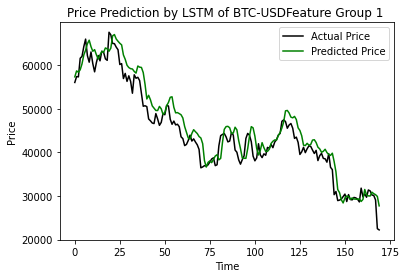

Epoch 1/50
22/22 [==============================] - 5s 9ms/step - loss: 0.0702
Epoch 2/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 5/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 6/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 9/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 10/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 11/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 12/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 13/50
22/22 [==============================

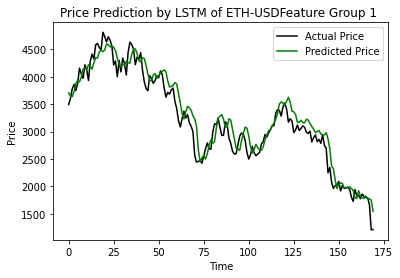

Epoch 1/50
22/22 [==============================] - 5s 8ms/step - loss: 0.0522
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0045
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 5/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 6/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 7/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0030
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 9/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 10/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 11/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 12/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 13/50
22/22 [==============================

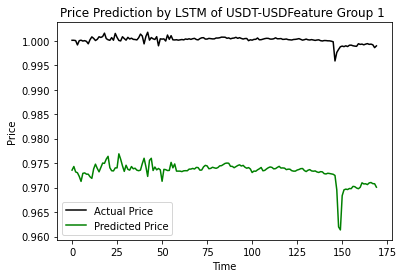

Epoch 1/50
22/22 [==============================] - 5s 12ms/step - loss: 0.0946
Epoch 2/50
22/22 [==============================] - 0s 13ms/step - loss: 0.0091
Epoch 3/50
22/22 [==============================] - 0s 13ms/step - loss: 0.0059
Epoch 4/50
22/22 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 5/50
22/22 [==============================] - 0s 11ms/step - loss: 0.0048
Epoch 6/50
22/22 [==============================] - 0s 11ms/step - loss: 0.0047
Epoch 7/50
22/22 [==============================] - 0s 10ms/step - loss: 0.0045
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 9/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 10/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 11/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 12/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 13/50
22/22 [=======================

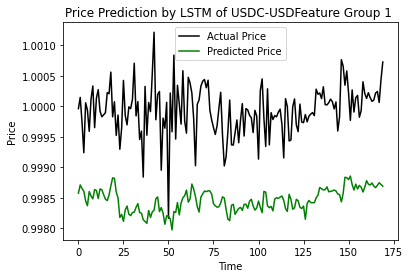

Epoch 1/50
22/22 [==============================] - 5s 8ms/step - loss: 0.0518
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 5/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 6/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 7/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 9/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 10/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 11/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 12/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 13/50
22/22 [==============================

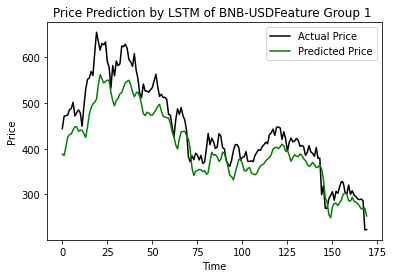

Epoch 1/50
22/22 [==============================] - 5s 9ms/step - loss: 0.0441
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0120
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0034
Epoch 4/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 5/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 6/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 7/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 8/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 9/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 10/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 11/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 12/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 13/50
22/22 [==============================

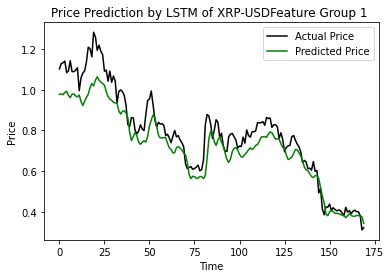

Epoch 1/50
17/17 [==============================] - 5s 16ms/step - loss: 0.0767
Epoch 2/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0079
Epoch 3/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 4/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 5/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 6/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 7/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 8/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 9/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 10/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 11/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 12/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 13/50
17/17 [=============================

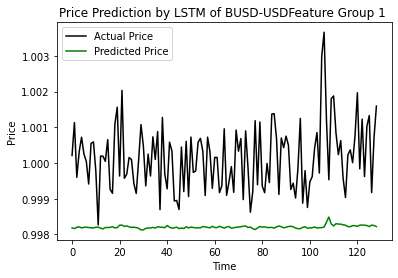

Epoch 1/50
22/22 [==============================] - 5s 8ms/step - loss: 0.0580
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 5/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 6/50
22/22 [==============================] - 0s 10ms/step - loss: 0.0010
Epoch 7/50
22/22 [==============================] - 0s 9ms/step - loss: 9.0469e-04
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 9/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 10/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 11/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 12/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 13/50
22/22 [=========================

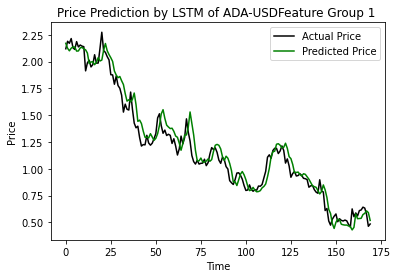

Epoch 1/50
14/14 [==============================] - 5s 9ms/step - loss: 0.0984
Epoch 2/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0370
Epoch 3/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 4/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0049
Epoch 5/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 7/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 8/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 9/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 10/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 11/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0018
Epoch 12/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 13/50
14/14 [============================

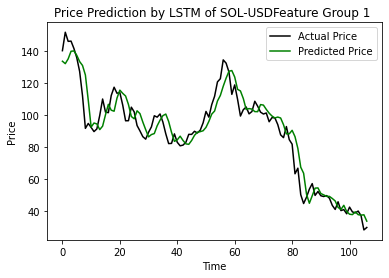

Epoch 1/50
22/22 [==============================] - 5s 9ms/step - loss: 0.0292
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 3/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 4/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 5/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 6/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 8/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 9/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 10/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 11/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 12/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 13/50
22/22 [==============================

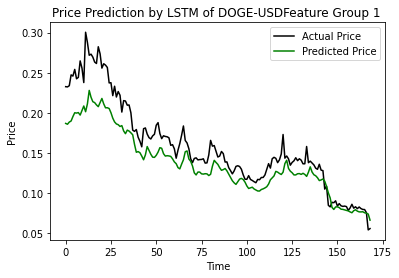

Epoch 1/50
11/11 [==============================] - 5s 9ms/step - loss: 0.1802
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0625
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0357
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0202
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 6/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 7/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0056
Epoch 8/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 9/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0047
Epoch 10/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 11/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 12/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 13/50
11/11 [============================

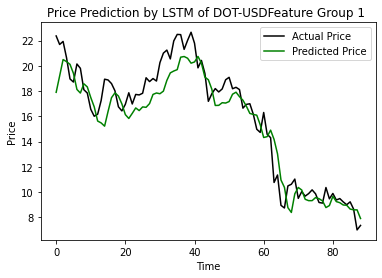

Epoch 1/50
16/16 [==============================] - 5s 9ms/step - loss: 0.0555
Epoch 2/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0053
Epoch 5/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 6/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 7/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0053
Epoch 8/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 9/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 10/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 11/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 12/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 13/50
16/16 [============================

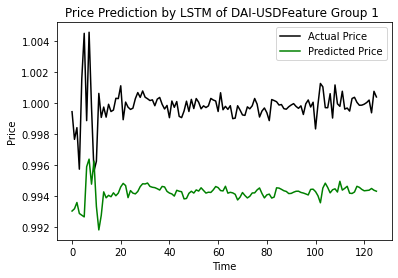

Epoch 1/50
20/20 [==============================] - 6s 9ms/step - loss: 0.0469
Epoch 2/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0090
Epoch 3/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 4/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 6/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 7/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 8/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 9/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 10/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 11/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 12/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 13/50
20/20 [===========================

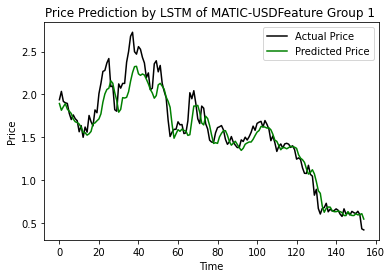

Epoch 1/50
11/11 [==============================] - 5s 9ms/step - loss: 0.1173
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0545
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0309
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0089
Epoch 5/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0051
Epoch 6/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 7/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0035
Epoch 8/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0035
Epoch 9/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 10/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 11/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0033
Epoch 12/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0028
Epoch 13/50
11/11 [=============================

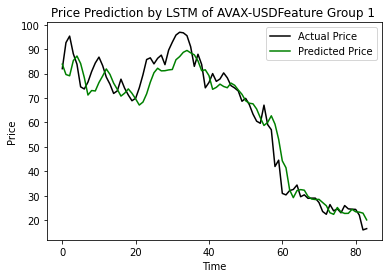

In [ ]:
# perform LSTM for 14 cryptocurrencies of feature group 1
for crypto in list_crypto:
  get_LSTM(d["df_" + str(crypto) + '_1'], str(crypto)+'Feature Group 1')

Epoch 1/50
22/22 [==============================] - 5s 8ms/step - loss: 0.0805
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 5/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 6/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 9/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 10/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 11/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 12/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 13/50
22/22 [==============================

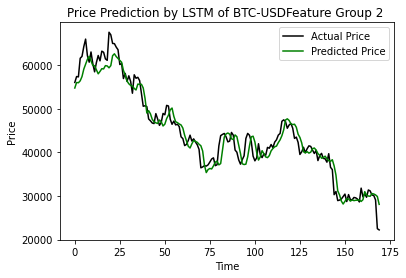

Epoch 1/50
22/22 [==============================] - 5s 8ms/step - loss: 0.0583
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 5/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 6/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 9/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 10/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 11/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 12/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 13/50
22/22 [==============================

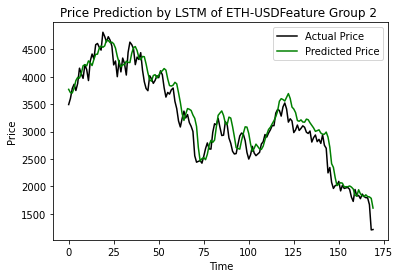

Epoch 1/50
22/22 [==============================] - 5s 8ms/step - loss: 0.0478
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 5/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 6/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 8/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 9/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 10/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 11/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 12/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 13/50
22/22 [==============================

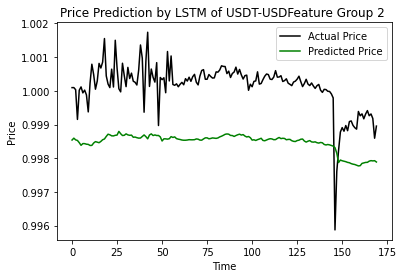

Epoch 1/50
22/22 [==============================] - 5s 9ms/step - loss: 0.0835
Epoch 2/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 3/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 5/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 6/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 9/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0036
Epoch 10/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 11/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0035
Epoch 12/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 13/50
22/22 [==============================

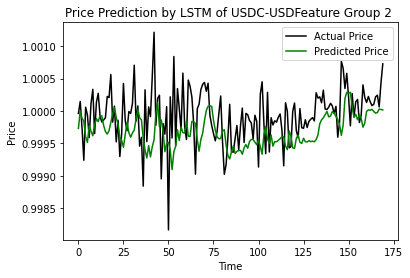

Epoch 1/50
22/22 [==============================] - 5s 9ms/step - loss: 0.0500
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 3/50
22/22 [==============================] - 0s 17ms/step - loss: 0.0030
Epoch 4/50
22/22 [==============================] - 0s 17ms/step - loss: 0.0022
Epoch 5/50
22/22 [==============================] - 0s 15ms/step - loss: 0.0024
Epoch 6/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 9/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 10/50
22/22 [==============================] - 0s 13ms/step - loss: 0.0016
Epoch 11/50
22/22 [==============================] - 0s 11ms/step - loss: 0.0015
Epoch 12/50
22/22 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 13/50
22/22 [========================

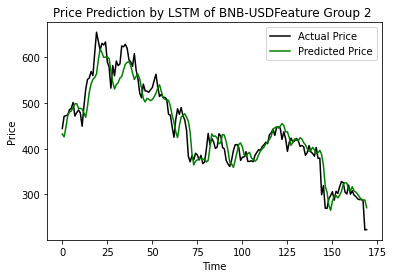

Epoch 1/50
22/22 [==============================] - 5s 9ms/step - loss: 0.0348
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0058
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 4/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 5/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 6/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0030
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 8/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 9/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 10/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 11/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 12/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 13/50
22/22 [==============================

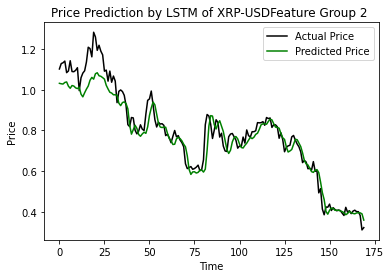

Epoch 1/50
17/17 [==============================] - 5s 8ms/step - loss: 0.0731
Epoch 2/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 3/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 4/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 5/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 6/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 7/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0024
Epoch 8/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 9/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 10/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 11/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 12/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 13/50
17/17 [==============================

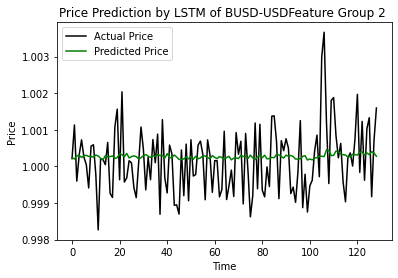

Epoch 1/50
22/22 [==============================] - 5s 8ms/step - loss: 0.0485
Epoch 2/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 3/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0032
Epoch 4/50
22/22 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 5/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 6/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 7/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 8/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 9/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 10/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 11/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 12/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 13/50
22/22 [=============================

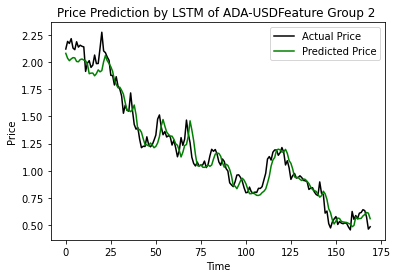

Epoch 1/50
14/14 [==============================] - 5s 9ms/step - loss: 0.0944
Epoch 2/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0271
Epoch 3/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 4/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0053
Epoch 5/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0032
Epoch 6/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0026
Epoch 7/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 8/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 9/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0023
Epoch 10/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0022
Epoch 11/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 12/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 13/50
14/14 [===========================

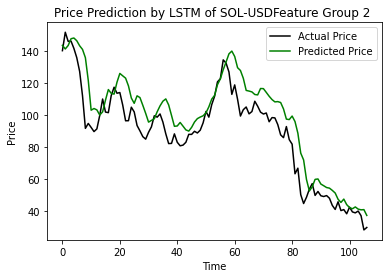

Epoch 1/50
22/22 [==============================] - 5s 8ms/step - loss: 0.0227
Epoch 2/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0051
Epoch 3/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 4/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 5/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 6/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0021
Epoch 7/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 8/50
22/22 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 9/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 10/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 11/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 12/50
22/22 [==============================] - 0s 9ms/step - loss: 0.0015
Epoch 13/50
22/22 [==============================

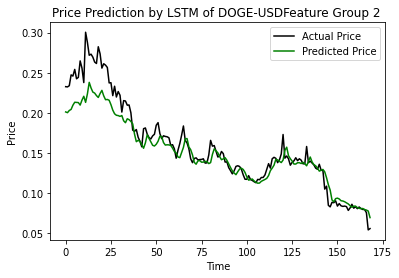

Epoch 1/50
11/11 [==============================] - 5s 9ms/step - loss: 0.1780
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0435
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0248
Epoch 4/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 5/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 6/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 7/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 8/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0068
Epoch 9/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 10/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0055
Epoch 11/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0052
Epoch 12/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0053
Epoch 13/50
11/11 [==============================

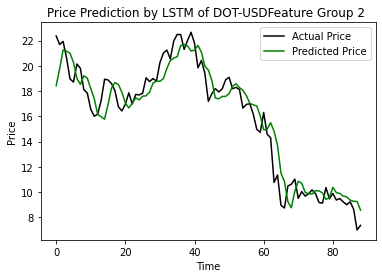

Epoch 1/50
16/16 [==============================] - 5s 9ms/step - loss: 0.0523
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0077
Epoch 3/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0047
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 5/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 6/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 7/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 8/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 9/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 10/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0041
Epoch 11/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 12/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 13/50
16/16 [=============================

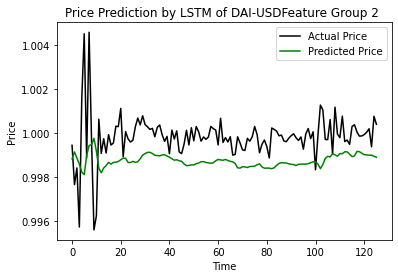

Epoch 1/50
20/20 [==============================] - 6s 9ms/step - loss: 0.0403
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0073
Epoch 3/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0049
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 5/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 6/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0024
Epoch 7/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0025
Epoch 8/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 9/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 10/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 11/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 12/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 13/50
20/20 [=============================

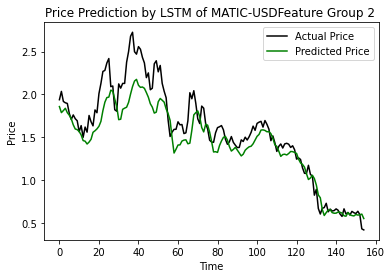

Epoch 1/50
11/11 [==============================] - 5s 9ms/step - loss: 0.1161
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0395
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0197
Epoch 4/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 6/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0042
Epoch 7/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 8/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0050
Epoch 9/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 10/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0038
Epoch 11/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0035
Epoch 12/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 13/50
11/11 [==============================

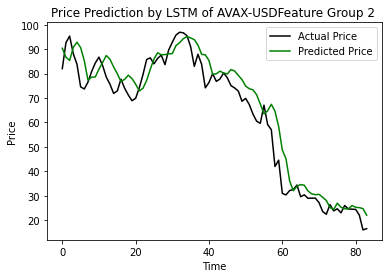

In [ ]:
# perform LSTM for 14 cryptocurrencies of feature group 2
for crypto in list_crypto:
  get_LSTM(d["df_" + str(crypto) + '_2'], str(crypto)+'Feature Group 2')

BTC-USDFeature Group 1 SVR RSME: 2803.2600
BTC-USDFeature Group 1 SVR MAPE: 4.70%
BTC-USDFeature Group 1 SVR MAE: 2133.3335
BTC-USDFeature Group 1 SVR r_square: 0.9261


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


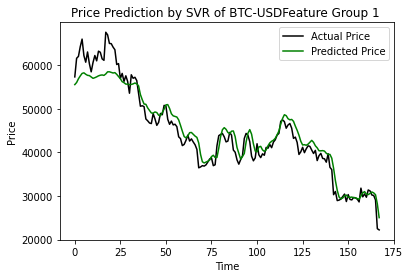

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ETH-USDFeature Group 1 SVR RSME: 310.3048
ETH-USDFeature Group 1 SVR MAPE: 5.76%
ETH-USDFeature Group 1 SVR MAE: 208.8831
ETH-USDFeature Group 1 SVR r_square: 0.8639


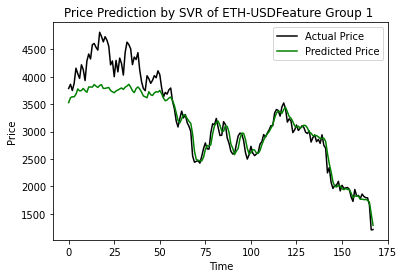

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


USDT-USDFeature Group 1 SVR RSME: 0.0015
USDT-USDFeature Group 1 SVR MAPE: 0.13%
USDT-USDFeature Group 1 SVR MAE: 0.0013
USDT-USDFeature Group 1 SVR r_square: -3.8259


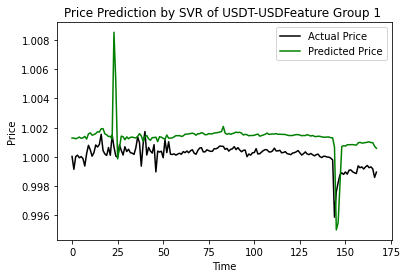

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


USDC-USDFeature Group 1 SVR RSME: 0.0045
USDC-USDFeature Group 1 SVR MAPE: 0.43%
USDC-USDFeature Group 1 SVR MAE: 0.0043
USDC-USDFeature Group 1 SVR r_square: -122.9493


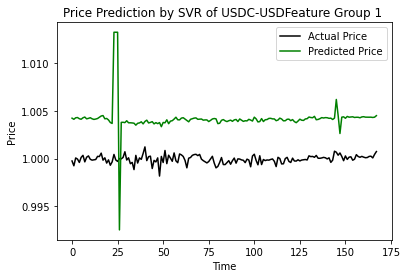

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BNB-USDFeature Group 1 SVR RSME: 22.2655
BNB-USDFeature Group 1 SVR MAPE: 4.62%
BNB-USDFeature Group 1 SVR MAE: 19.0382
BNB-USDFeature Group 1 SVR r_square: 0.9478


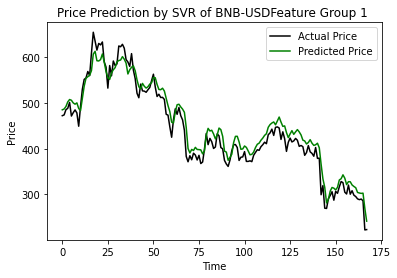

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XRP-USDFeature Group 1 SVR RSME: 0.0641
XRP-USDFeature Group 1 SVR MAPE: 7.81%
XRP-USDFeature Group 1 SVR MAE: 0.0573
XRP-USDFeature Group 1 SVR r_square: 0.9177


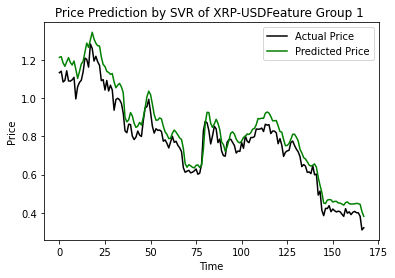

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BUSD-USDFeature Group 1 SVR RSME: 0.0025
BUSD-USDFeature Group 1 SVR MAPE: 0.24%
BUSD-USDFeature Group 1 SVR MAE: 0.0024
BUSD-USDFeature Group 1 SVR r_square: -6.8478


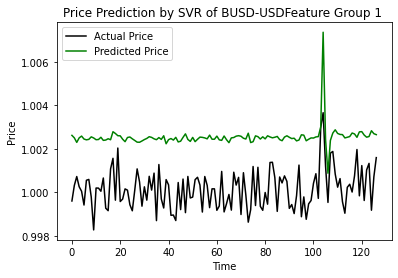

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ADA-USDFeature Group 1 SVR RSME: 0.0917
ADA-USDFeature Group 1 SVR MAPE: 7.06%
ADA-USDFeature Group 1 SVR MAE: 0.0770
ADA-USDFeature Group 1 SVR r_square: 0.9629


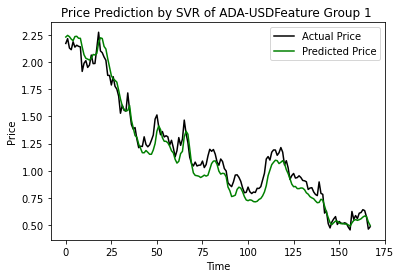

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SOL-USDFeature Group 1 SVR RSME: 7.1812
SOL-USDFeature Group 1 SVR MAPE: 7.53%
SOL-USDFeature Group 1 SVR MAE: 5.6324
SOL-USDFeature Group 1 SVR r_square: 0.9340


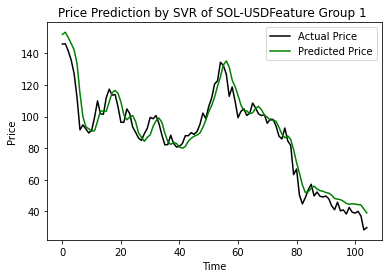

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DOGE-USDFeature Group 1 SVR RSME: 0.0187
DOGE-USDFeature Group 1 SVR MAPE: 13.92%
DOGE-USDFeature Group 1 SVR MAE: 0.0166
DOGE-USDFeature Group 1 SVR r_square: 0.8806


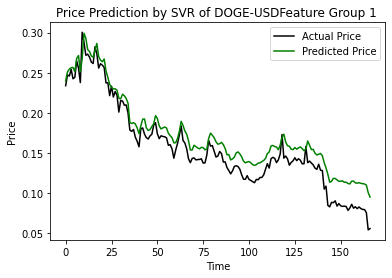

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DOT-USDFeature Group 1 SVR RSME: 1.3189
DOT-USDFeature Group 1 SVR MAPE: 8.34%
DOT-USDFeature Group 1 SVR MAE: 1.1212
DOT-USDFeature Group 1 SVR r_square: 0.9136


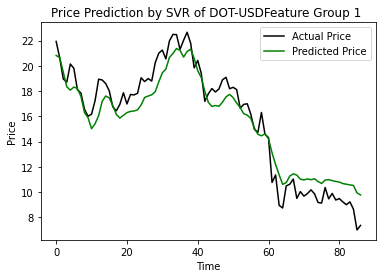

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DAI-USDFeature Group 1 SVR RSME: 0.0109
DAI-USDFeature Group 1 SVR MAPE: 1.09%
DAI-USDFeature Group 1 SVR MAE: 0.0109
DAI-USDFeature Group 1 SVR r_square: -114.9050


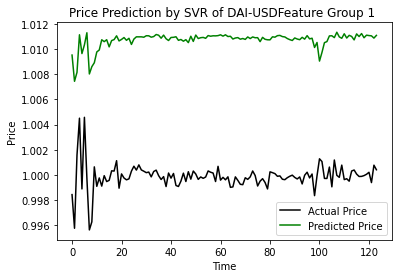

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MATIC-USDFeature Group 1 SVR RSME: 0.1901
MATIC-USDFeature Group 1 SVR MAPE: 7.29%
MATIC-USDFeature Group 1 SVR MAE: 0.1223
MATIC-USDFeature Group 1 SVR r_square: 0.8771


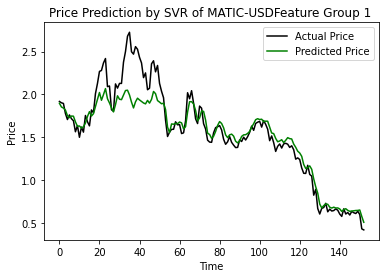

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AVAX-USDFeature Group 1 SVR RSME: 5.5065
AVAX-USDFeature Group 1 SVR MAPE: 11.26%
AVAX-USDFeature Group 1 SVR MAE: 4.6997
AVAX-USDFeature Group 1 SVR r_square: 0.9528


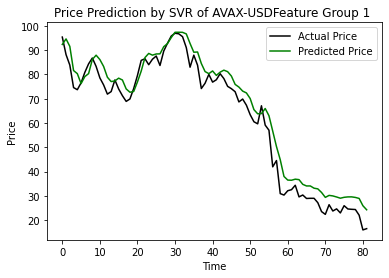

In [ ]:
# perform SVR for 14 cryptocurrencies of feature group 1
for crypto in list_crypto:
  get_svr(d["df_" + str(crypto) + '_1'], str(crypto)+'Feature Group 1')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BTC-USDFeature Group 2 SVR RSME: 3137.2600
BTC-USDFeature Group 2 SVR MAPE: 5.95%
BTC-USDFeature Group 2 SVR MAE: 2475.0769
BTC-USDFeature Group 2 SVR r_square: 0.9075


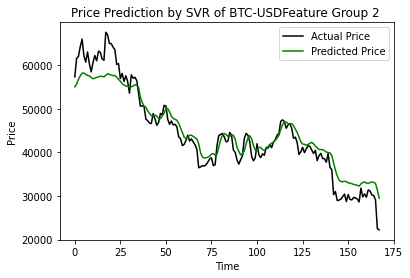

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ETH-USDFeature Group 2 SVR RSME: 642.1060
ETH-USDFeature Group 2 SVR MAPE: 11.80%
ETH-USDFeature Group 2 SVR MAE: 429.1066
ETH-USDFeature Group 2 SVR r_square: 0.4171


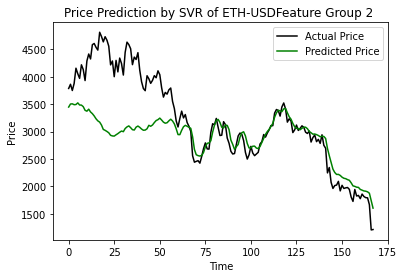

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


USDT-USDFeature Group 2 SVR RSME: 0.0034
USDT-USDFeature Group 2 SVR MAPE: 0.33%
USDT-USDFeature Group 2 SVR MAE: 0.0033
USDT-USDFeature Group 2 SVR r_square: -22.9784


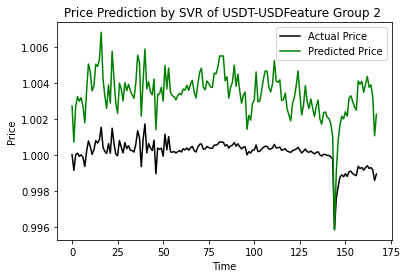

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


USDC-USDFeature Group 2 SVR RSME: 0.0047
USDC-USDFeature Group 2 SVR MAPE: 0.47%
USDC-USDFeature Group 2 SVR MAE: 0.0047
USDC-USDFeature Group 2 SVR r_square: -132.1258


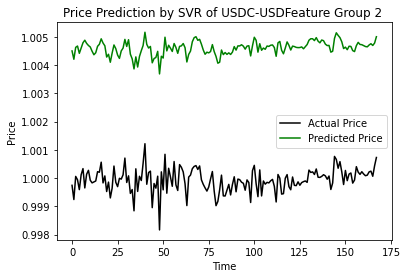

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BNB-USDFeature Group 2 SVR RSME: 24.6852
BNB-USDFeature Group 2 SVR MAPE: 4.63%
BNB-USDFeature Group 2 SVR MAE: 18.7964
BNB-USDFeature Group 2 SVR r_square: 0.9358


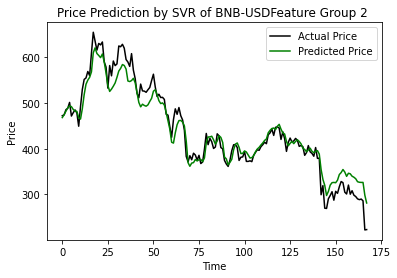

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XRP-USDFeature Group 2 SVR RSME: 0.0517
XRP-USDFeature Group 2 SVR MAPE: 5.88%
XRP-USDFeature Group 2 SVR MAE: 0.0445
XRP-USDFeature Group 2 SVR r_square: 0.9464


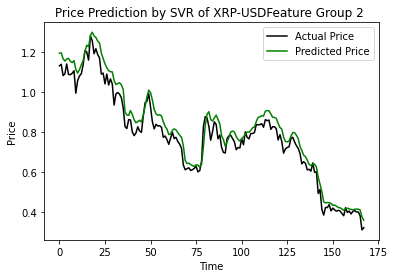

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BUSD-USDFeature Group 2 SVR RSME: 0.0023
BUSD-USDFeature Group 2 SVR MAPE: 0.22%
BUSD-USDFeature Group 2 SVR MAE: 0.0022
BUSD-USDFeature Group 2 SVR r_square: -5.2582


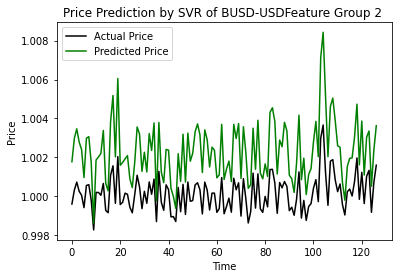

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ADA-USDFeature Group 2 SVR RSME: 0.0968
ADA-USDFeature Group 2 SVR MAPE: 7.53%
ADA-USDFeature Group 2 SVR MAE: 0.0807
ADA-USDFeature Group 2 SVR r_square: 0.9587


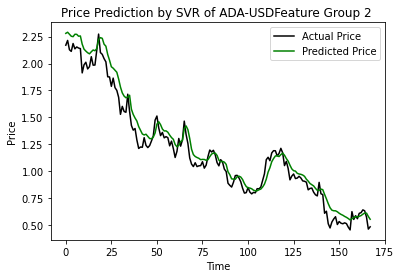

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SOL-USDFeature Group 2 SVR RSME: 12.1642
SOL-USDFeature Group 2 SVR MAPE: 14.99%
SOL-USDFeature Group 2 SVR MAE: 10.4471
SOL-USDFeature Group 2 SVR r_square: 0.8105


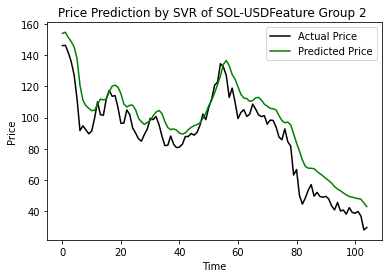

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DOGE-USDFeature Group 2 SVR RSME: 0.0510
DOGE-USDFeature Group 2 SVR MAPE: 38.25%
DOGE-USDFeature Group 2 SVR MAE: 0.0484
DOGE-USDFeature Group 2 SVR r_square: 0.1151


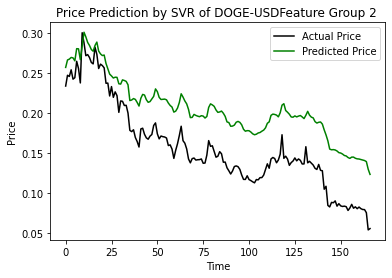

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DOT-USDFeature Group 2 SVR RSME: 1.2832
DOT-USDFeature Group 2 SVR MAPE: 8.30%
DOT-USDFeature Group 2 SVR MAE: 1.0574
DOT-USDFeature Group 2 SVR r_square: 0.9182


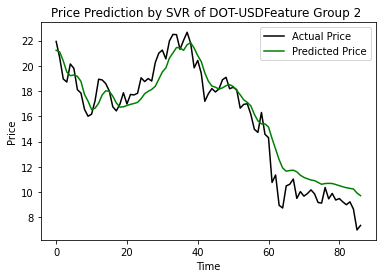

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DAI-USDFeature Group 2 SVR RSME: 0.0013
DAI-USDFeature Group 2 SVR MAPE: 0.12%
DAI-USDFeature Group 2 SVR MAE: 0.0012
DAI-USDFeature Group 2 SVR r_square: -0.5203


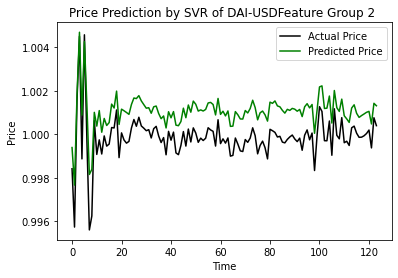

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MATIC-USDFeature Group 2 SVR RSME: 0.3939
MATIC-USDFeature Group 2 SVR MAPE: 16.42%
MATIC-USDFeature Group 2 SVR MAE: 0.2606
MATIC-USDFeature Group 2 SVR r_square: 0.4722


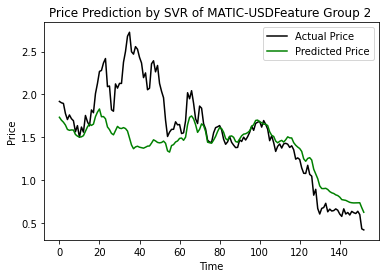

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AVAX-USDFeature Group 2 SVR RSME: 5.1118
AVAX-USDFeature Group 2 SVR MAPE: 10.38%
AVAX-USDFeature Group 2 SVR MAE: 4.1593
AVAX-USDFeature Group 2 SVR r_square: 0.9593


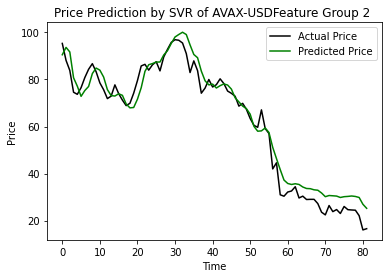

In [ ]:
# perform SVR for 14 cryptocurrencies of feature group 2
for crypto in list_crypto:
  get_svr(d["df_" + str(crypto) + '_2'], str(crypto)+'Feature Group 2')

[13:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
BTC-USDFeature Group 1 XGB RSME: 2129.6100
BTC-USDFeature Group 1 XGB MAPE: 3.05%
BTC-USDFeature Group 1 XGB MAE: 1440.8833
BTC-USDFeature Group 1 XGB r_square: 0.9574


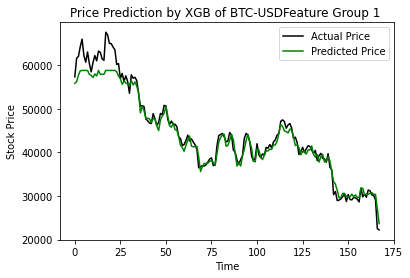

[13:00:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
ETH-USDFeature Group 1 XGB RSME: 350.9608
ETH-USDFeature Group 1 XGB MAPE: 5.78%
ETH-USDFeature Group 1 XGB MAE: 215.6474
ETH-USDFeature Group 1 XGB r_square: 0.8259


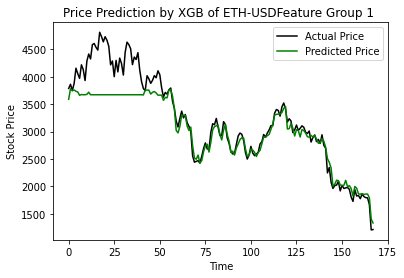

[13:01:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
USDT-USDFeature Group 1 XGB RSME: 0.0014
USDT-USDFeature Group 1 XGB MAPE: 0.11%
USDT-USDFeature Group 1 XGB MAE: 0.0011
USDT-USDFeature Group 1 XGB r_square: -3.3290


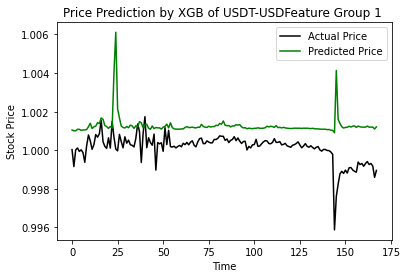

[13:01:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
USDC-USDFeature Group 1 XGB RSME: 0.0009
USDC-USDFeature Group 1 XGB MAPE: 0.07%
USDC-USDFeature Group 1 XGB MAE: 0.0007
USDC-USDFeature Group 1 XGB r_square: -4.0816


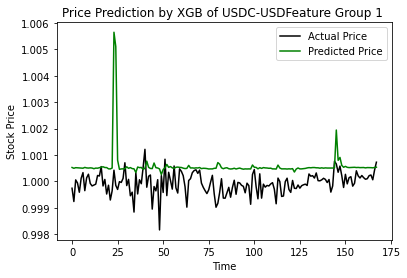

[13:01:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
BNB-USDFeature Group 1 XGB RSME: 17.0800
BNB-USDFeature Group 1 XGB MAPE: 3.02%
BNB-USDFeature Group 1 XGB MAE: 13.1523
BNB-USDFeature Group 1 XGB r_square: 0.9693


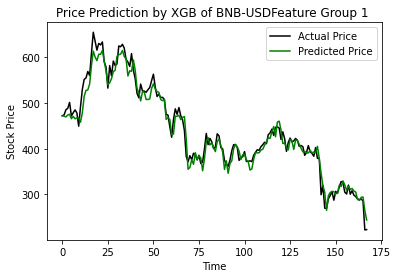

[13:01:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XRP-USDFeature Group 1 XGB RSME: 0.0340
XRP-USDFeature Group 1 XGB MAPE: 4.27%
XRP-USDFeature Group 1 XGB MAE: 0.0277
XRP-USDFeature Group 1 XGB r_square: 0.9769


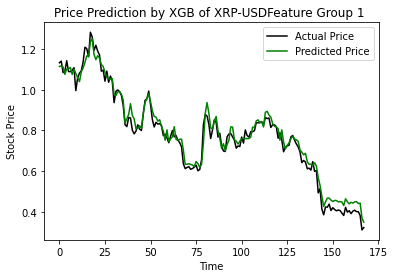

[13:01:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
BUSD-USDFeature Group 1 XGB RSME: 0.0012
BUSD-USDFeature Group 1 XGB MAPE: 0.10%
BUSD-USDFeature Group 1 XGB MAE: 0.0010
BUSD-USDFeature Group 1 XGB r_square: -0.6801


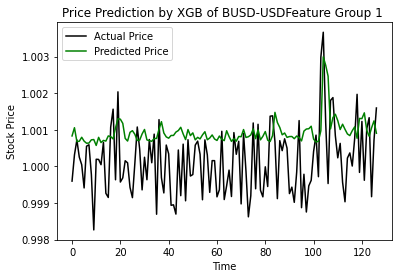

[13:01:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
ADA-USDFeature Group 1 XGB RSME: 0.0802
ADA-USDFeature Group 1 XGB MAPE: 7.59%
ADA-USDFeature Group 1 XGB MAE: 0.0658
ADA-USDFeature Group 1 XGB r_square: 0.9717


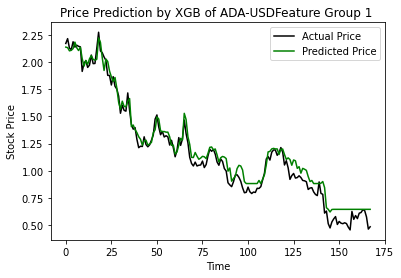

[13:01:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SOL-USDFeature Group 1 XGB RSME: 6.7563
SOL-USDFeature Group 1 XGB MAPE: 7.52%
SOL-USDFeature Group 1 XGB MAE: 5.6373
SOL-USDFeature Group 1 XGB r_square: 0.9415


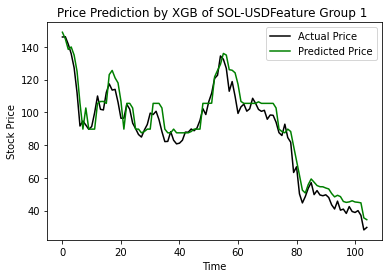

[13:01:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
DOGE-USDFeature Group 1 XGB RSME: 0.0208
DOGE-USDFeature Group 1 XGB MAPE: 14.34%
DOGE-USDFeature Group 1 XGB MAE: 0.0174
DOGE-USDFeature Group 1 XGB r_square: 0.8530


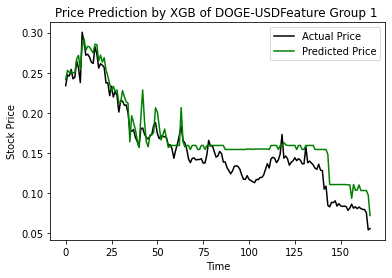

[13:01:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
DOT-USDFeature Group 1 XGB RSME: 1.1961
DOT-USDFeature Group 1 XGB MAPE: 7.75%
DOT-USDFeature Group 1 XGB MAE: 1.0045
DOT-USDFeature Group 1 XGB r_square: 0.9289


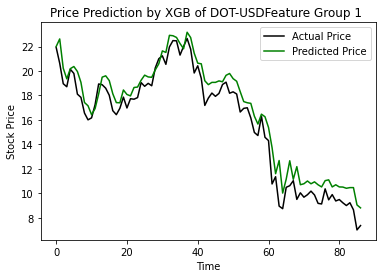

[13:01:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
DAI-USDFeature Group 1 XGB RSME: 0.0026
DAI-USDFeature Group 1 XGB MAPE: 0.25%
DAI-USDFeature Group 1 XGB MAE: 0.0025
DAI-USDFeature Group 1 XGB r_square: -5.5677


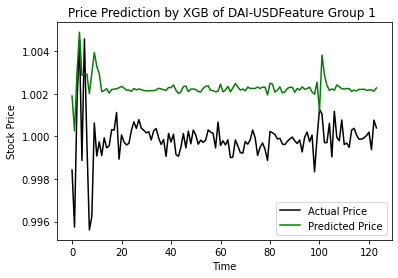

[13:01:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MATIC-USDFeature Group 1 XGB RSME: 0.2221
MATIC-USDFeature Group 1 XGB MAPE: 8.21%
MATIC-USDFeature Group 1 XGB MAE: 0.1365
MATIC-USDFeature Group 1 XGB r_square: 0.8322


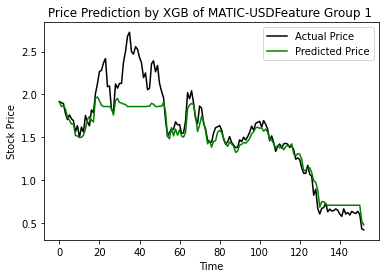

[13:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AVAX-USDFeature Group 1 XGB RSME: 3.7909
AVAX-USDFeature Group 1 XGB MAPE: 7.34%
AVAX-USDFeature Group 1 XGB MAE: 3.1555
AVAX-USDFeature Group 1 XGB r_square: 0.9776


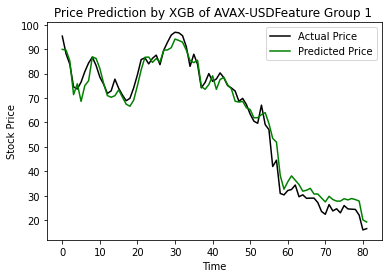

In [ ]:
# perform XGB for 14 cryptocurrencies of feature group 1
for crypto in list_crypto:
  get_XGB(d["df_" + str(crypto) + '_1'], str(crypto)+'Feature Group 1')

[13:01:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
BTC-USDFeature Group 2 XGB RSME: 2048.2356
BTC-USDFeature Group 2 XGB MAPE: 2.90%
BTC-USDFeature Group 2 XGB MAE: 1371.1272
BTC-USDFeature Group 2 XGB r_square: 0.9606


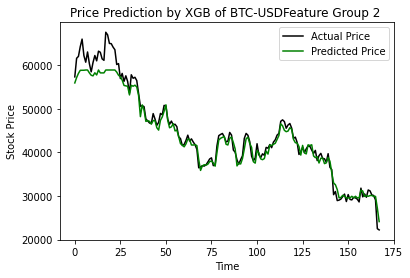

[13:01:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
ETH-USDFeature Group 2 XGB RSME: 367.6831
ETH-USDFeature Group 2 XGB MAPE: 5.93%
ETH-USDFeature Group 2 XGB MAE: 225.0776
ETH-USDFeature Group 2 XGB r_square: 0.8089


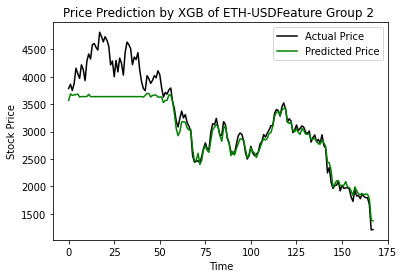

[13:01:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
USDT-USDFeature Group 2 XGB RSME: 0.0009
USDT-USDFeature Group 2 XGB MAPE: 0.09%
USDT-USDFeature Group 2 XGB MAE: 0.0009
USDT-USDFeature Group 2 XGB r_square: -0.6858


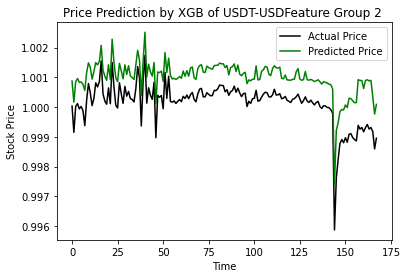

[13:01:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
USDC-USDFeature Group 2 XGB RSME: 0.0005
USDC-USDFeature Group 2 XGB MAPE: 0.04%
USDC-USDFeature Group 2 XGB MAE: 0.0004
USDC-USDFeature Group 2 XGB r_square: -0.3236


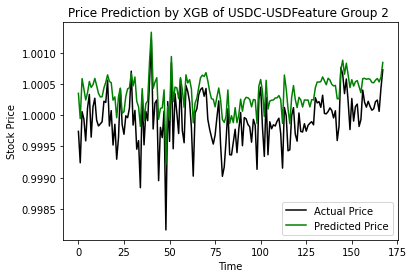

[13:01:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
BNB-USDFeature Group 2 XGB RSME: 16.0541
BNB-USDFeature Group 2 XGB MAPE: 2.71%
BNB-USDFeature Group 2 XGB MAE: 12.1528
BNB-USDFeature Group 2 XGB r_square: 0.9728


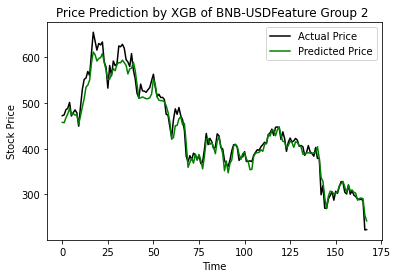

[13:01:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XRP-USDFeature Group 2 XGB RSME: 0.0306
XRP-USDFeature Group 2 XGB MAPE: 3.96%
XRP-USDFeature Group 2 XGB MAE: 0.0253
XRP-USDFeature Group 2 XGB r_square: 0.9812


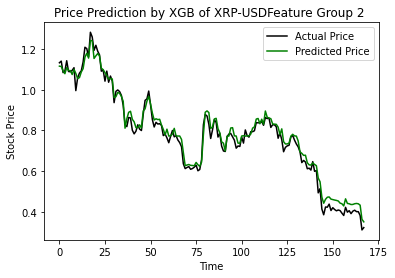

[13:01:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
BUSD-USDFeature Group 2 XGB RSME: 0.0008
BUSD-USDFeature Group 2 XGB MAPE: 0.07%
BUSD-USDFeature Group 2 XGB MAE: 0.0007
BUSD-USDFeature Group 2 XGB r_square: 0.3072


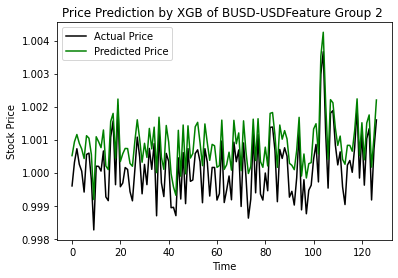

[13:01:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
ADA-USDFeature Group 2 XGB RSME: 0.0743
ADA-USDFeature Group 2 XGB MAPE: 6.91%
ADA-USDFeature Group 2 XGB MAE: 0.0597
ADA-USDFeature Group 2 XGB r_square: 0.9757


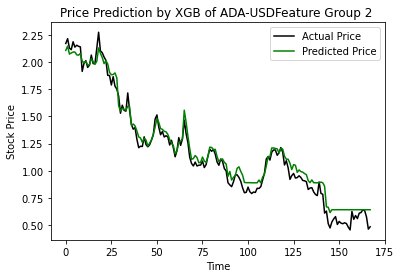

[13:01:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
SOL-USDFeature Group 2 XGB RSME: 7.8747
SOL-USDFeature Group 2 XGB MAPE: 9.79%
SOL-USDFeature Group 2 XGB MAE: 6.6995
SOL-USDFeature Group 2 XGB r_square: 0.9206


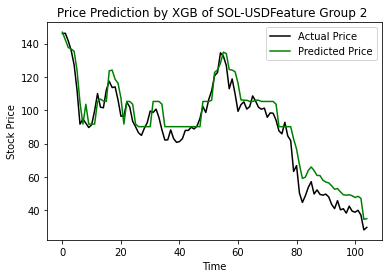

[13:01:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
DOGE-USDFeature Group 2 XGB RSME: 0.0325
DOGE-USDFeature Group 2 XGB MAPE: 23.48%
DOGE-USDFeature Group 2 XGB MAE: 0.0268
DOGE-USDFeature Group 2 XGB r_square: 0.6419


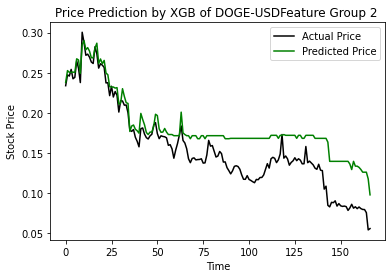

[13:01:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
DOT-USDFeature Group 2 XGB RSME: 1.1507
DOT-USDFeature Group 2 XGB MAPE: 7.67%
DOT-USDFeature Group 2 XGB MAE: 0.9714
DOT-USDFeature Group 2 XGB r_square: 0.9342


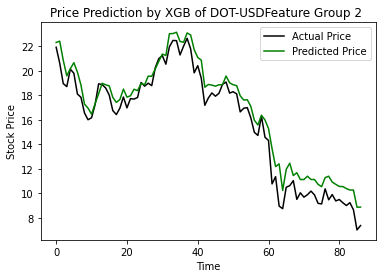

[13:01:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
DAI-USDFeature Group 2 XGB RSME: 0.0020
DAI-USDFeature Group 2 XGB MAPE: 0.20%
DAI-USDFeature Group 2 XGB MAE: 0.0020
DAI-USDFeature Group 2 XGB r_square: -2.9234


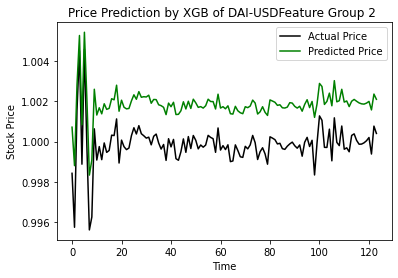

[13:01:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MATIC-USDFeature Group 2 XGB RSME: 0.2222
MATIC-USDFeature Group 2 XGB MAPE: 8.42%
MATIC-USDFeature Group 2 XGB MAE: 0.1392
MATIC-USDFeature Group 2 XGB r_square: 0.8320


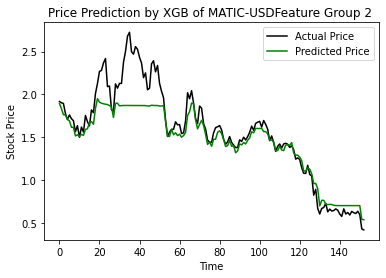

[13:01:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
AVAX-USDFeature Group 2 XGB RSME: 3.7816
AVAX-USDFeature Group 2 XGB MAPE: 7.49%
AVAX-USDFeature Group 2 XGB MAE: 3.0570
AVAX-USDFeature Group 2 XGB r_square: 0.9777


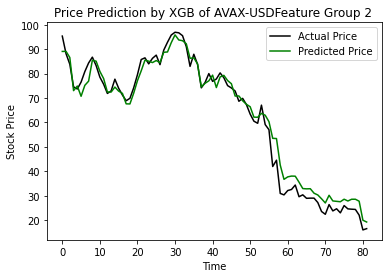

In [ ]:
# perform XGB for 14 cryptocurrencies of feature group 2
for crypto in list_crypto:
  get_XGB(d["df_" + str(crypto) + '_2'], str(crypto)+'Feature Group 2')